In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#useful imports
import random
import re

# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Import Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
df=pd.read_csv('url.csv')

In [3]:
df.head()

,URLs,Class
0,http://localhost/netbanking/index.php,good
1,en.wikipedia.org/wiki/Joie_Lee,good
2,pipl.com/directory/people/Rejean/Beaudin,good
3,flickr.com/photos/teneyck/sets/72157610336209297/,good
4,http://localhost/netbanking/index.php,good


In [4]:
#---------------  DATA CLEANING -----------

In [5]:
#Checking Null Values and dropping them
df.isnull()
df.isnull().sum()

URLs     0
Class    4
dtype: int64

In [6]:
df=df.dropna()
df.isnull().sum()

URLs     0
Class    0
dtype: int64

In [7]:
#Removing duplicated Data
dups=df.duplicated()
print(dups.any())
df[dups]

True


,URLs,Class
4,http://localhost/netbanking/index.php,good
2773,dbplumbingnt.com.au/file/files/db/file.dropbox/,bad
5132,benditas.net.br/wp-content/message/,bad
5527,bandkhasi.net/1avsq,bad
7009,5n7y4yihirccftc5.tor2web.org/,bad
...,...,...
420326,bulldogmiami.com/Yh00/Yahoo,bad
420333,prolocotrichiana.it/images/good,bad
420344,theinfinitewellbeing.com/secure.suntrust.com.p...,bad
420356,eightplusnine.com/54ghnnuo,bad


In [8]:
#Dropping the duplicated data
df=df.drop_duplicates()
dups=df.duplicated()
dups.any()
df.reset_index()

,index,URLs,Class
0,0,http://localhost/netbanking/index.php,good
1,1,en.wikipedia.org/wiki/Joie_Lee,good
2,2,pipl.com/directory/people/Rejean/Beaudin,good
3,3,flickr.com/photos/teneyck/sets/72157610336209297/,good
4,5,http://localhost/testing/index.php,good
...,...,...,...
411240,420461,ourorigins.org/genealogielistfirstname.aspx?an...,good
411241,420462,simira.co.id/cifk/live.com/Account_Verified.htm,bad
411242,420463,kstatesports.com/sports/w-baskbl/spec-rel/ksu-...,good
411243,420464,vh1.com/video/living-colour/9128/cult-of-perso...,good


In [9]:
#---------------  SPLITTING DATA --------------

In [10]:
#Splitting dataset for training and testing
train,test=train_test_split(df,train_size=0.8,random_state=40)
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
trainx=train['URLs']
trainy=train['Class']
testx=test['URLs']
testy=test['Class']
train.head()

,URLs,Class
0,joey-fatone.com/wp-content/plugins/aa.php,bad
1,reachinformation.com/define/KPIX-TV.aspx,good
2,denizlideevdenevenakliyat.com/admin/session/fi...,bad
3,nz.linkedin.com/in/hazeljennings,good
4,familytreemaker.genealogy.com/users/e/v/e/Marc...,good


In [11]:
#---------------  DATA VSIUALIZATION -----------

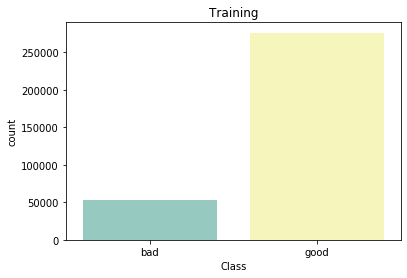

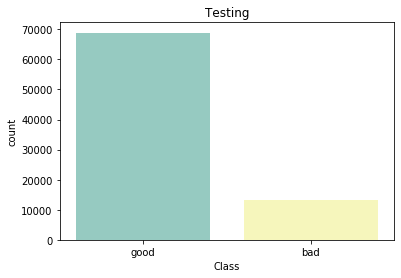

In [12]:
sns.countplot(x='Class',data=train, palette = 'Set3')
plt.title("Training")
plt.show()

sns.countplot(x='Class',data=test, palette = 'Set3')
plt.title("Testing")
plt.show()

In [13]:
#----------TRAINING DATASET   --------

In [14]:
#Vectorizing (to find frequencies of words)
# --Removing un wanted words in data
def rtokenize(url):  
    tokens = re.split('[/-]', url)
    if(tokens[0]=="https:" or tokens[0]=="http:"):
        tokens.pop(0)
    if(tokens[0]==""):
        tokens.pop(0)
    
    for i in tokens:
        if i.find(".") >= 0:
            tokens.remove(i)
            dot_split = i.split('.')
            if "com" in dot_split:
                dot_split.remove("com")
            if "www" in dot_split:
                dot_split.remove("www")
            tokens += dot_split  
    return ' '.join(tokens)

In [15]:
# Manually perform term count for an example
df=df.reset_index()
url=df['URLs'][10]
url=rtokenize(url)
tokens=url.split(" ")
print("URL: ",url)
print("\nURL Tokens: ",tokens)
print('\nFrequency Counts: ')
for i in list(dict.fromkeys(tokens)):
    print("{}-{}".format(i,tokens.count(i)),end=' | ')

URL:  wiki Category:Ahuntsic_College ossd wikia

URL Tokens:  ['wiki', 'Category:Ahuntsic_College', 'ossd', 'wikia']

Frequency Counts: 
wiki-1 | Category:Ahuntsic_College-1 | ossd-1 | wikia-1 | 

In [16]:
#Perform Count Vectorizer using Count and Tfidf vectorizer
evec=CountVectorizer()
ex=evec.fit_transform([url])
efeatures=evec.get_feature_names()
ecounts=ex.toarray()
print("Count Vectorizer: ")
for i in range(len(ecounts[0])):
    print(efeatures[i],'-',ecounts[0][i],end=' |')
print("\n")

ecounts=[]
evec=TfidfVectorizer()
ex=evec.fit_transform([url])
efeatures=evec.get_feature_names()
ecounts=ex.toarray()
print("Tfidf Vectorizer: ")
for i in range(len(ecounts[0])):
    print(efeatures[i],'-',ecounts[0][i],end=' | ')

Count Vectorizer: 
ahuntsic_college - 1 |category - 1 |ossd - 1 |wiki - 1 |wikia - 1 |

Tfidf Vectorizer: 
ahuntsic_college - 0.4472135954999579 | category - 0.4472135954999579 | ossd - 0.4472135954999579 | wiki - 0.4472135954999579 | wikia - 0.4472135954999579 | 

In [17]:
#--------Implementing different Vectorizers----------

In [18]:
#--Fitting the training data
#1. Count vectorizer

cv=CountVectorizer()
cvx=cv.fit_transform(train['URLs'])
test_cvx=cv.transform(test['URLs'])

#2. Term Frequency-Inverse Document Frequency (TF-IDF)
tv=TfidfVectorizer()
tvx=tv.fit_transform(train['URLs'])
test_tvx=tv.transform(test['URLs'])


In [19]:
cv.vocabulary_

{'joey': 206701,
 'fatone': 164454,
 'com': 132746,
 'wp': 349502,
 'content': 134750,
 'plugins': 273660,
 'aa': 82150,
 'php': 271418,
 'reachinformation': 284359,
 'define': 144273,
 'kpix': 214836,
 'tv': 330844,
 'aspx': 96536,
 'denizlideevdenevenakliyat': 144953,
 'admin': 85018,
 'session': 300121,
 'file_doc': 166463,
 '_jehfuq_vjoxjogydw_oxk0k0qwhtogydw_product': 79360,
 'userid': 335540,
 'nz': 257788,
 'linkedin': 222049,
 'in': 196815,
 'hazeljennings': 185503,
 'familytreemaker': 163720,
 'genealogy': 176040,
 'users': 335559,
 'marc': 230187,
 'denis': 144897,
 'everell': 160776,
 'website': 344174,
 '0001': 278,
 'uhp': 332650,
 'index': 197154,
 'html': 191985,
 'refrige': 285673,
 '2008': 27025,
 'special': 308112,
 'edition': 155176,
 'issue': 201063,
 'october': 258866,
 'december': 143950,
 'menu': 235032,
 'id': 194374,
 '2498': 37896,
 'rlslog': 289378,
 'net': 250521,
 'football': 169401,
 'manager': 229537,
 '2009': 27434,
 'tl': 324788,
 'juggle': 208679,
 'th

In [20]:
# -------------------Model Evaluation--------------------

In [21]:
# Multinomial Naive Bayesian with Count Vectorizer
mb_cv = MultinomialNB()
mb_cv.fit(cvx, trainy)
pred_mb_cv=mb_cv.predict(test_cvx)
mb_cv_score = mb_cv.score(test_cvx,testy)
mb_cv_cm = confusion_matrix(testy,pred_mb_cv)
mb_cv_report = classification_report(testy,pred_mb_cv)

# Multinomial Naive Bayesian with TF-IDF
mb_tv = MultinomialNB()
mb_tv.fit(tvx, trainy)
pred_mb_tv = mb_tv.predict(test_tvx)
mb_tv_score = mb_tv.score(test_cvx,testy)
mb_tv_cm = confusion_matrix(testy,pred_mb_tv)
mb_tv_report = classification_report(testy,pred_mb_tv)

In [22]:
#Logistic Regression with Count
lg_cv=LogisticRegression(solver='liblinear')
lg_cv.fit(cvx,trainy)
pred_lg_cv=lg_cv.predict(test_cvx)
lg_cv_score = lg_cv.score(test_cvx,testy)
lg_cv_cm = confusion_matrix(testy,pred_lg_cv)
lg_cv_report = classification_report(testy,pred_lg_cv)

#Logistic Regression with TF-IDF
lg_tv=LogisticRegression(solver='liblinear')
lg_tv.fit(tvx,trainy)
pred_lg_tv=lg_tv.predict(test_tvx)
lg_tv_score = lg_tv.score(test_tvx,testy)
lg_tv_cm = confusion_matrix(testy,pred_lg_tv)
lg_tv_report = classification_report(testy,pred_lg_tv)


In [23]:
#Scores
print("MB Count score: ",mb_cv_score)
print("MB tfidf score: ",mb_tv_score)
print("LG Count score: ",lg_cv_score)
print("LG tfidf score: ",lg_tv_score)

#count vectorizer got good score in Multmonial Naive Bayes

MB Count score:  0.9707838393171954
MB tfidf score:  0.9607776386339044
LG Count score:  0.9691789565830587
LG tfidf score:  0.9635983416211747


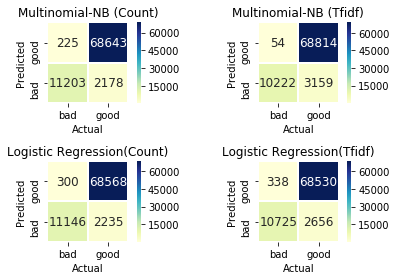

<Figure size 1080x1080 with 0 Axes>

In [24]:
# Confusion Matrix 
def plot_confusion_matrix(cm1,cm2,cm3,cm4):
    fig,ax = plt.subplots(2, 2)
    plt.figure(figsize=(15,15))
    g1=sns.heatmap(cm1, annot=True,fmt="d", linewidths=.99, square=True,cmap = 'YlGnBu', annot_kws={"size": 12}, 
              xticklabels=['bad', 'good'], yticklabels=['bad', 'good'],ax=ax[0,0])

    g2=sns.heatmap(cm2, annot=True,fmt="d", linewidths=.99, square=True,cmap = 'YlGnBu', annot_kws={"size": 12}, 
              xticklabels=['bad', 'good'], yticklabels=['bad', 'good'],ax=ax[0,1])

    g3=sns.heatmap(cm3, annot=True,fmt="d", linewidths=.99, square=True,cmap = 'YlGnBu', annot_kws={"size": 12}, 
              xticklabels=['bad', 'good'], yticklabels=['bad', 'good'],ax=ax[1,0])

    g4=sns.heatmap(cm4, annot=True,fmt="d", linewidths=.99, square=True,cmap = 'YlGnBu', annot_kws={"size": 12}, 
              xticklabels=['bad', 'good'], yticklabels=['bad', 'good'],ax=ax[1,1])

    g1.set_ylim(0 ,2)
    g2.set_ylim(0 ,2)
    g3.set_ylim(0 ,2)
    g4.set_ylim(0 ,2)
    
    i=0
    for axs in ax.flat:
        if(i==0):
            axs.set_title("Multinomial-NB (Count)")
        if(i==1):
            axs.set_title("Multinomial-NB (Tfidf)")
        if(i==2):
            axs.set_title("Logistic Regression(Count)")
        if(i==3):
            axs.set_title("Logistic Regression(Tfidf)")
            
        i=i+1
        axs.set(xlabel='Actual', ylabel='Predicted')

    fig.tight_layout()
    plt.show()    

plot_confusion_matrix(mb_cv_cm, mb_tv_cm, lg_cv_cm, lg_tv_cm)

In [25]:
#Classification Report
print("Multimobial Naive Bayes (Count Vetorizer): \n",mb_cv_report)
print("------------------------------------------------------------")
print("Multimobial Naive Bayes (Tfidf Vetorizer): \n",mb_tv_report)
print("------------------------------------------------------------")
print("Logistic Regression (Count Vetorizer): \n",lg_cv_report)
print("------------------------------------------------------------")
print("Logistic Regression (Tfidf Vetorizer): \n",lg_tv_report)

# Multimonial Naive Bayes with Count Vectorizer got more accuracy

Multimobial Naive Bayes (Count Vetorizer): 
               precision    recall  f1-score   support

         bad       0.98      0.84      0.90     13381
        good       0.97      1.00      0.98     68868

    accuracy                           0.97     82249
   macro avg       0.97      0.92      0.94     82249
weighted avg       0.97      0.97      0.97     82249

------------------------------------------------------------
Multimobial Naive Bayes (Tfidf Vetorizer): 
               precision    recall  f1-score   support

         bad       0.99      0.76      0.86     13381
        good       0.96      1.00      0.98     68868

    accuracy                           0.96     82249
   macro avg       0.98      0.88      0.92     82249
weighted avg       0.96      0.96      0.96     82249

------------------------------------------------------------
Logistic Regression (Count Vetorizer): 
               precision    recall  f1-score   support

         bad       0.97      0.83     

In [26]:
#We got more score and accuracy using Multinomial Naive Bayes with count Vectorizer (0.97)

In [27]:
#Check performance of our model by comparing scores with Dummy Classifier
# Training a Dummy Classifier
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train['URLs'], trainy)
score = dummy_clf.score(testx, testy)

print("Testing Acc with Dummy Classifier:", score)
#We found our model got more score with less logloss compared to the dummy classfier

Testing Acc with Dummy Classifier: 0.8373110919281693


In [28]:
#-------------------Final Model for implemnting------------------------

In [29]:
cv=CountVectorizer()
cv.fit(train['URLs'])
cv.transform(train['URLs'])

#Classifier
mb_cv = MultinomialNB()
mb_cv.fit(cvx, trainy)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
pred=['google.com/']
a=cv.transform(pred)
mb_cv.predict(a)

array(['good'], dtype='<U4')